In [27]:
import sys, os
sys.path.append('C:/myStudy/ZeroKaraTsukuru/chap04')

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [28]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [29]:
# 하이퍼 파라미터
iters_num = 10000   # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

In [30]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 결과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09931666666666666, 0.099
train acc, test acc | 0.7901, 0.7956
train acc, test acc | 0.8748333333333334, 0.881
train acc, test acc | 0.8982666666666667, 0.9014
train acc, test acc | 0.90745, 0.9126
train acc, test acc | 0.9151, 0.9165
train acc, test acc | 0.9203666666666667, 0.9216
train acc, test acc | 0.9246333333333333, 0.9247
train acc, test acc | 0.9274166666666667, 0.9287
train acc, test acc | 0.9313666666666667, 0.9329
train acc, test acc | 0.9344833333333333, 0.934
train acc, test acc | 0.9372, 0.9365
train acc, test acc | 0.9396333333333333, 0.9393
train acc, test acc | 0.9411833333333334, 0.9408
train acc, test acc | 0.9434, 0.9412
train acc, test acc | 0.9455833333333333, 0.9437
train acc, test acc | 0.94715, 0.945


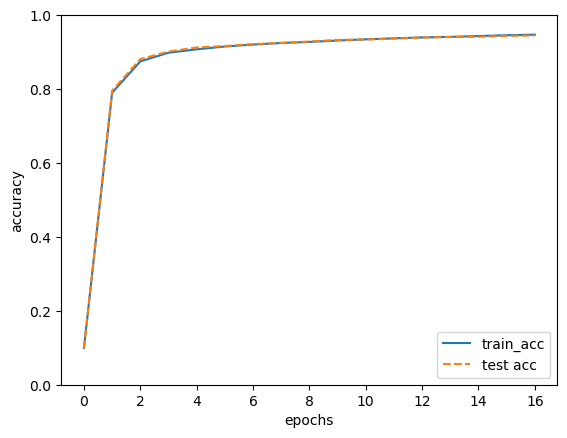

In [31]:
# 그래프 그리기
markers = {'train':'o', 'test':'s'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train_acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()